In [1]:
import numpy as np
import scipy.special as sp
from low_freq_prototype import LowFreq2DFieldGenerator

from numpy.fft import fft2, fftfreq
import matplotlib.pyplot as plt

In [2]:
sigma2 = 2
z_i = 500.0
psi_deg = 45.0

L_2D = 15_000.0

grid_dimensions = np.array([40 * L_2D, 5 * L_2D])
grid_levels = np.array([6, 4])

generator = LowFreq2DFieldGenerator(
    grid_dimensions,
    grid_levels,
    L_2D= L_2D,
    sigma2 = sigma2,
    z_i = 500.0,
    psi_degs = 45.0,
    c = None,
)


In [3]:
assert generator.c is not None

In [4]:
def analytic_F11_2D(k1: float) -> float:
    """
    Analytic solution for F11(k1).
    """
    a = 1 + 2 * (k1 * L_2D * np.cos(generator.psi_rad))**2
    b = 1 + 2 * (k1 * z_i * np.cos(generator.psi_rad))**2
    p = (L_2D**2 * b) / (z_i**2 * a)

    d = 1.0

    first_term_numerator = (sp.gamma(11/6) * (L_2D**(11/3)))\
        * (-p * sp.hyp2f1(5/6, 1, 1/2, p) - 7 * sp.hyp2f1(5/6, 1, 1/2, p)\
           + 2 * sp.hyp2f1(-1/6, 1, 1/2, p))
    first_term_denominator = 10 * np.sqrt(2 * np.pi) * (L_2D)

    second_term_numerator = (L_2D**(14/3) * np.sqrt(b))
    second_term_denominator = (2 * np.sqrt(2) * d**(7/3) * (z_i * np.sin(generator.psi_rad)))

    return generator.c * ((first_term_numerator / first_term_denominator) \
                          + (second_term_numerator / second_term_denominator))


def analytic_F22_2D(k1: float) -> float:
    """
    
    """
    a = 1 + 2 * (k1 * L_2D * np.cos(generator.psi_rad))**2
    b = 1 + 2 * (k1 * z_i * np.cos(generator.psi_rad))**2
    p = (L_2D**2 * b) / (z_i**2 * a)

    d = 1.0

    leading_factor_num = z_i**4 * a**(1/6) * L_2D**(11/3) * sp.gamma(17/6)
    leading_factor_denom = 55 * np.sqrt(2 * np.pi) * (L_2D**2 - z_i**2)**2\
        * b * sp.gamma(7/3) * np.sin(generator.psi_rad)
    leading_factor = - leading_factor_num / leading_factor_denom

    line_1 = -9 - 25 * sp.hyp2f1(-1/6, 1, 1/2, p)
    line_2 = p**2 * ( 15 - 30 * sp.hyp2f1(-1/6, 1, 1/2, p) - 59 * sp.hyp2f1(5/6, 1, 1/2, p))
    line_3 = 35 * sp.hyp2f1(5/6, 1, 1/2, p) + 15 * p**3 * sp.hyp2f1(5/6, 1, 1/2, p)
    line_4 = p * (-54 + 88 * sp.hyp2f1(-1/6, 1, 1/2, p) + 9 * sp.hyp2f1(5/6, 1, 1/2, p))

    term_1 = leading_factor * (line_1 + line_2 + line_3 + line_4)

    term_2 = (L_2D**(14/3)) / (np.sqrt(2 * b) * d**(7/3) * z_i * np.sin(generator.psi_rad))

    paren = term_1 - term_2

    return generator.c * k1**2 * paren

/var/folders/xr/kfzp127x60q_6gm1sqwbzts40000gn/T/ipykernel_25041/1810795798.py:12: RuntimeWarning: invalid value encountered in scalar add
  * (-p * sp.hyp2f1(5/6, 1, 1/2, p) - 7 * sp.hyp2f1(5/6, 1, 1/2, p)\


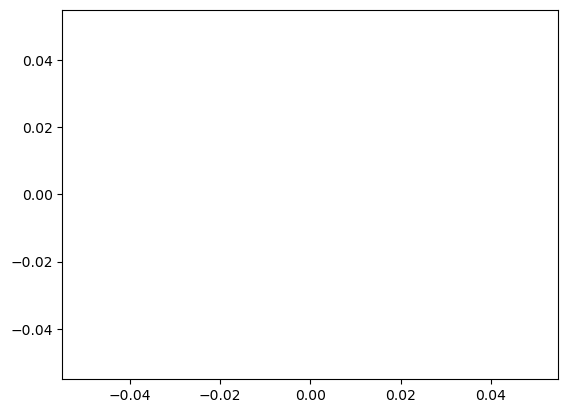

In [6]:
x_axis = np.logspace(-3, 0, 100)
y_axis = np.array([analytic_F11_2D(L_2D * k1) for k1 in x_axis])

plt.plot(x_axis, y_axis)
plt.show()


In [9]:
sum_sim_F11 = None
sum_sim_F22 = None